In [1]:
%pip install -q langchain-google-genai langchain_core langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 7.6 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(api_key=GEMINI_API_KEY, model="gemini-1.5-flash")

In [6]:
def add(x: int, y: int) -> int:
  """Adds two numbers together.

  Args:
    x: The first number.
    y: The second number.

  Returns:
    The sum of x and y.
  """
  return x + y


def subtract(x: int, y: int) -> int:
  """Subtracts two numbers.

  Args:
    x: The first number.
    y: The second number.

  Returns:
    The difference between x and y.
  """
  return x - y


def multiply(x: int, y: int) -> int:
  """Multiplies two numbers.

  Args:
    x: The first number.
    y: The second number.

  Returns:
    The product of x and y.
  """
  return x * y


def divide(x: int, y: int) -> int:
  """Divides two numbers.

  Args:
    x: The first number.
    y: The second number.

  Returns:
    The quotient of x and y.
  """
  if y == 0:
    return "Division by zero error!"
  return x / y

tools = [add, subtract, multiply, divide]

In [7]:
llm_with_tools = llm.bind_tools(tools)

In [12]:
from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.graph.state import CompiledStateGraph
from langchain_core.messages import HumanMessage
from IPython.display import display, Image

def assistant(state: MessagesState) -> MessagesState:
  return {"messages": [llm_with_tools.invoke(state["messages"])]}

builder: StateGraph = StateGraph(state_schema=MessagesState)

builder.add_node("AI Assistant", assistant)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "AI Assistant")
builder.add_conditional_edges("AI Assistant", tools_condition)
builder.add_edge("tools", "AI Assistant")

graph = builder.compile()

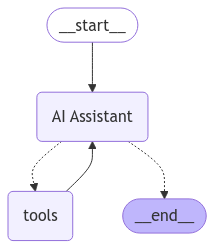

In [13]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
messages = graph.invoke({"messages": [HumanMessage(content="Add 5 + 5")]})

for msg in messages["messages"]:
  msg.pretty_print()


================================ Human Message =================================

Add 5 + 5
================================== Ai Message ==================================
Tool Calls:
  add (eaf094b5-79aa-4cae-9f5f-d1c617856da9)
 Call ID: eaf094b5-79aa-4cae-9f5f-d1c617856da9
  Args:
    y: 5.0
    x: 5.0
================================= Tool Message =================================
Name: add

10
================================== Ai Message ==================================

The result is 10.
